In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

# Analyze data

### Demographic information

In [34]:
df_demo = pd.read_csv('../data/ICBHI_Challenge_demographic_information.txt', sep='\t', header=None)
df_demo = df_demo.rename(columns={0: 'ID', 1: 'age', 2: 'sex', 3: 'BMI', 4: 'weight', 5: 'height'})
df_diagnosis = pd.read_csv('../data/ICBHI_Challenge_diagnosis.txt', sep='\t', header=None)
df_diagnosis = df_diagnosis.rename(columns={0: 'ID', 1: 'diagnosis'})

df = pd.merge(df_demo, df_diagnosis, on='ID')
df.head()

,ID,age,sex,BMI,weight,height,diagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI


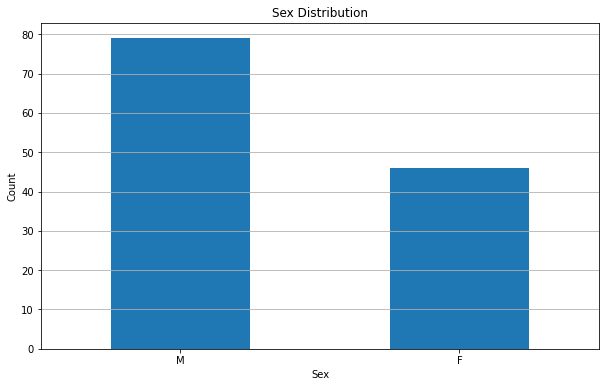

In [35]:
plt.figure(figsize=(10, 6))
df['sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()



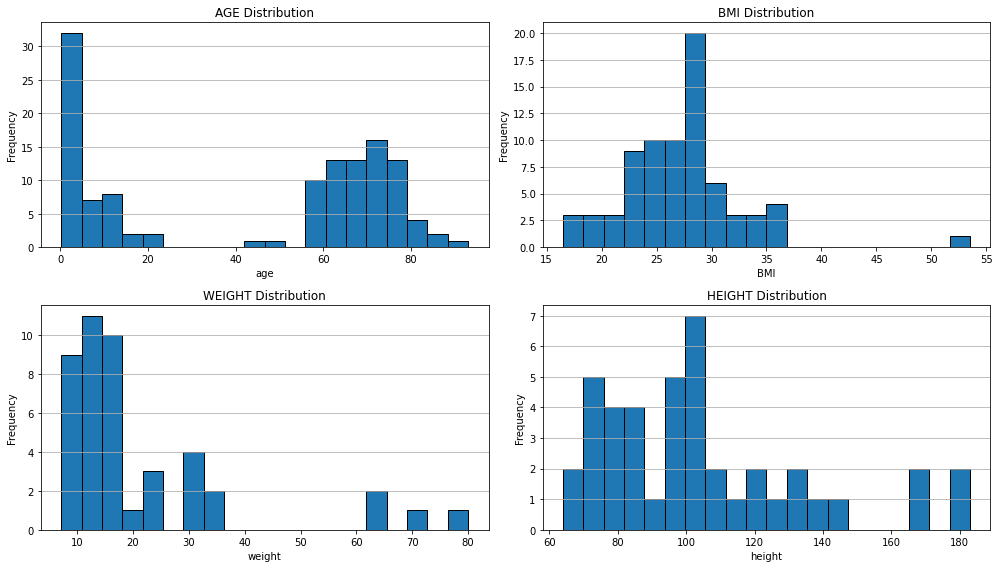

In [38]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))

columns = ['age', 'BMI', 'weight', 'height']
plot_num = 0

for i in range(2):
    for j in range(2):       
        
        axs[i, j].hist(df[columns[plot_num]], bins=20, edgecolor='black')
        axs[i, j].set_title(f'{columns[plot_num].upper()} Distribution')
        axs[i, j].set_xlabel(columns[plot_num])
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].grid(axis='y')
        
        plot_num += 1
plt.tight_layout()
plt.show()

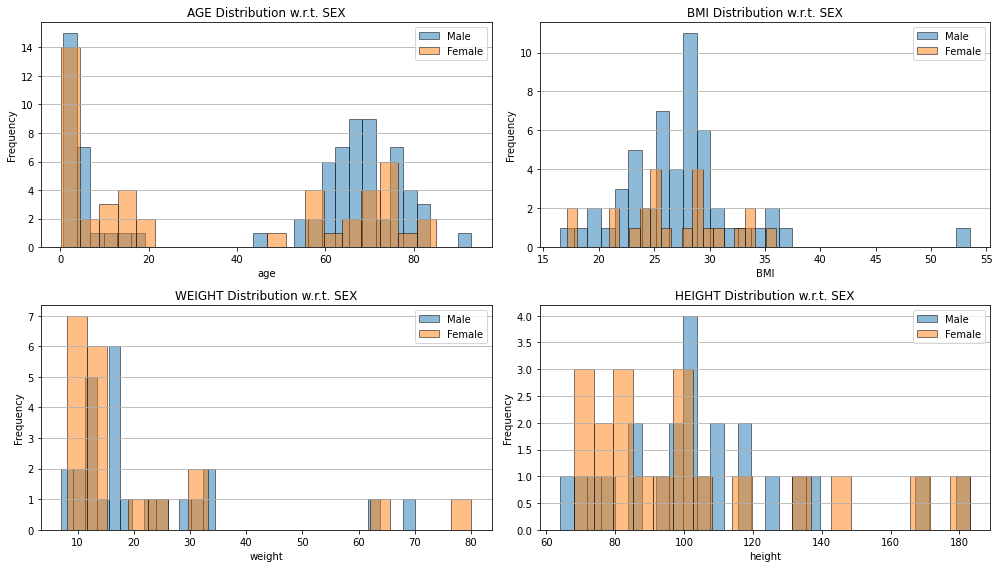

In [39]:
fig, axs = plt.subplots(2,2, figsize=(14, 8))

columns = ['age', 'BMI', 'weight', 'height']
plot_num = 0

for i in range(2):
    for j in range(2):       
        
        axs[i, j].hist(df[df['sex'] == 'M'][columns[plot_num]], bins=30, alpha=0.5, edgecolor='black', label='Male')
        axs[i, j].hist(df[df['sex'] == 'F'][columns[plot_num]], bins=20, alpha=0.5, edgecolor='black', label='Female')
        axs[i, j].set_title(f'{columns[plot_num].upper()} Distribution w.r.t. SEX')
        axs[i, j].set_xlabel(columns[plot_num])
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].grid(axis='y')
        axs[i, j].legend()
        
        plot_num += 1
plt.tight_layout()
plt.show()

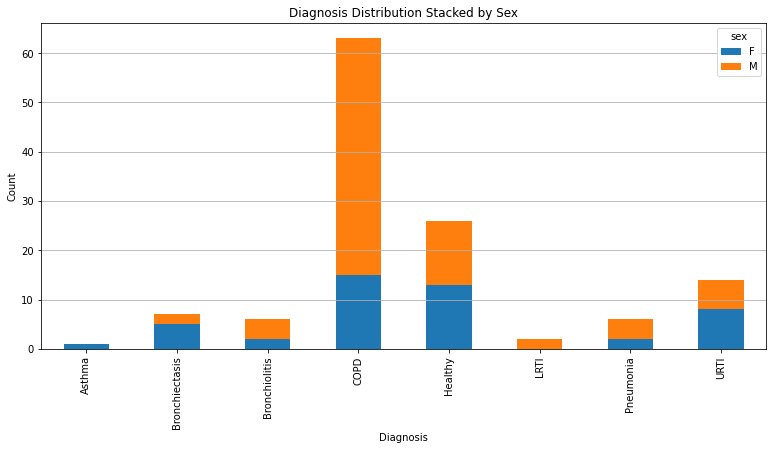

In [46]:
plt.figure(figsize=(13, 6))

df.groupby(['diagnosis', 'sex']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Diagnosis Distribution Stacked by Sex')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()